<h1>Predict price of google (GOOG) using Support Vector Machine (SVM) and Linear Regression</h1>


In [0]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
#dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('GOOG_30_days.csv')

Saving GOOG_30_days.csv to GOOG_30_days (1).csv


In [26]:
print(df.shape)

(19, 7)


In [20]:
#Last row of data (test data)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2019-06-28,1076.390015,1081.0,1073.369995,1080.910034,1080.910034,1693200


In [0]:
#All of data except for last row
df = df.head(len(df)-1)

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400
5,2019-06-10,1072.979980,1092.660034,1072.322021,1080.380005,1080.380005,1464200
6,2019-06-11,1093.979980,1101.989990,1077.603027,1078.719971,1078.719971,1436700
7,2019-06-12,1078.000000,1080.930054,1067.540039,1077.030029,1077.030029,1061000
8,2019-06-13,1083.640015,1094.170044,1080.150024,1088.770020,1088.770020,1057700
9,2019-06-14,1086.420044,1092.689941,1080.171997,1085.349976,1085.349976,1111500


In [0]:
#All rows from Date column
df_dates = df.loc[:,'Date']

#All rows from Open column
df_open = df.loc[:,'Open']

In [0]:
dates = []
prices = []

#Independent dataset X
for date in df_dates:
  dates.append([int(date.split('-')[2])])

#Dependent dataset y (prices)
for open_price in df_open:
  prices.append(float(open_price))

In [44]:
#Days of the month recorded
print(dates)

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]


<h1>Create Model</h1>

In [0]:
#Create 3 SVM models

def predict_prices(dates,prices,x):

  #Linear
  svr_lin = SVR(kernel='linear',C=1e3)

  #Poly
  svr_poly = SVR(kernel='poly',C=1e3,degree=2)

  #RBF
  svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)

  #Linear Regression model
  lr = LinearRegression()

  #Train the models
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  lr.fit(dates,prices)

  #Plot to see which model has best fit
  plt.scatter(dates,prices,color='black',label='Data')

  #Predictions on the dates (actual vs predicted)
  plt.plot(dates,svr_lin.predict(dates), color='red', label='SVR_Lin')
  plt.plot(dates,svr_poly.predict(dates), color='blue', label='SVR_Poly')
  plt.plot(dates,svr_rbf.predict(dates), color='green', label='SVR_RBF')
  plt.plot(dates,lr.predict(dates), color='orange', label='Linear Regression')
  plt.xlabel('Days')
  plt.ylabel('Price (USD)')
  plt.title('Regression')
  plt.legend(loc='best')
  plt.show()

  return svr_lin.predict(x)[0], svr_poly.predict(x)[0],svr_rbf.predict(x)[0],lr.predict(x)[0]

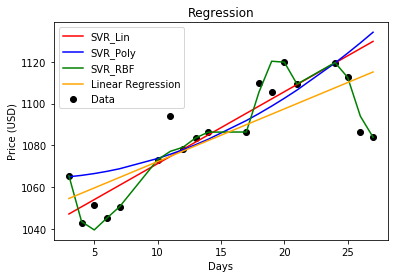

(1133.3133133337788, 1139.5478482146918, 1091.7058004910944, 1117.7087934280248)


In [51]:
#Predict the price of GOOG on the 28th day (2019-06-28)

predicted_price = predict_prices(dates,prices,[[28]])

print(predicted_price)